### importing dependencies and loading the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv').to_csv('HW2data', ignore_index=True)
df = pd.read_csv('HW2data').drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### exploring data
1- check nulls and dtypes. 
###
2- check graphs.
###
3- check uniques.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
## total bedrooms has some nulls
sum(df.total_bedrooms.isna())

207

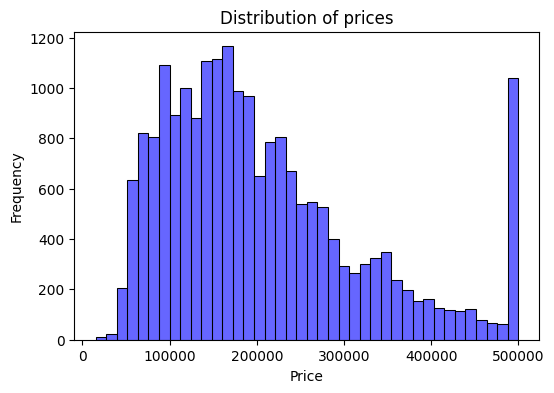

In [7]:
# visualising some col_vals
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='blue', alpha=0.6)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [8]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()} unique vals')

longitude : 844 unique vals
latitude : 862 unique vals
housing_median_age : 52 unique vals
total_rooms : 5926 unique vals
total_bedrooms : 1923 unique vals
population : 3888 unique vals
households : 1815 unique vals
median_income : 12928 unique vals
median_house_value : 3842 unique vals
ocean_proximity : 5 unique vals


In [9]:
for val in df.ocean_proximity.unique():
    print(f'{val} : repeated {sum(df[df.ocean_proximity==val].ocean_proximity.duplicated())} times')

NEAR BAY : repeated 2289 times
<1H OCEAN : repeated 9135 times
INLAND : repeated 6550 times
NEAR OCEAN : repeated 2657 times
ISLAND : repeated 4 times


###

### getting only the wanted data

In [10]:
df = df[df.ocean_proximity.isin(['<1H OCEAN' , 'INLAND' ])]
df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [11]:
wanted_cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
df = df[wanted_cols]
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### deviding data

In [69]:
def deviding_data(df, seed=42):
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

In [70]:
def extract_y(df_train, df_val, df_test):
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return y_train, y_val, y_test, df_train, df_val, df_test

### filling the null data 0 and mean

In [71]:
def prepare_x(df_train, fill='z'):
    df = df_train.copy()
    if fill=='z':

        df.total_bedrooms = df.total_bedrooms.fillna(0)


    elif fill=='mean':
        df.total_bedrooms = df.total_bedrooms.fillna(df.total_bedrooms.mean())
    return df

### linear reg

In [117]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [73]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [143]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

### full predict

In [82]:
def predict(df, seed=2, r=0, fill='z'):
    df_train, df_val, df_test = deviding_data(df,seed=seed)
    y_train, y_val, y_test, df_train, df_val, df_test = extract_y(df_train, df_val, df_test)
    x_train = prepare_x(df_train, fill=fill)
    x_val = prepare_x(df_val)
    x_test = prepare_x(df_test)
    w_0, w = train_linear_regression_reg(x_train, y_train, r=r)
    y_pred = w_0 + x_train.dot(w)
    train_score = rmse(y_train, y_pred)
    print(f'train:{train_score}')
    y_pred = w_0 + x_val.dot(w)
    val_score = rmse(y_val, y_pred)
    print(f'val:{val_score}')
    y_pred = w_0 + x_test.dot(w)
    test_score = rmse(y_test, y_pred)
    print(f'test:{test_score}')
    return train_score, val_score, test_score
    

In [76]:
# with 0 fillna
predict(df)

train:0.34027582719352
val:0.3384287006763761
test:0.33328548754673826


(-9.911560200953081,
 array([-2.69914047e-01, -2.57559087e-01,  1.92264005e-03, -3.40679630e-05,
         3.03040321e-04, -1.49763515e-04,  3.88143978e-04,  1.82156954e-01]))

In [77]:
# with mean fillna
predict(df, fill='mean')

train:0.3400374055516097
val:0.33862777279127415
test:0.3335993500982332


(-10.012979159904194,
 array([-2.70193111e-01, -2.58418606e-01,  1.93373169e-03, -3.99580321e-05,
         3.91576652e-04, -1.47240948e-04,  3.16972514e-04,  1.83885452e-01]))

In [87]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    predict(df, r=r)
    print(f'r:\t{r}')

train:0.34027582719352
val:0.3384287006763761
test:0.33328548754673826
r:	0
train:0.34027582719355287
val:0.3384287040851703
test:0.33328548409842856
r:	1e-06
train:0.3402758275212963
val:0.3384290419040407
test:0.33328514321957287
r:	0.0001
train:0.340275859845463
val:0.3384321368626356
test:0.33328208316355984
r:	0.001
train:0.3402789705825776
val:0.3384653418935614
test:0.33325518681714983
r:	0.01
train:0.3404983770811622
val:0.3389401586637704
test:0.3332461455651414
r:	0.1
train:0.34359274995903105
val:0.34294277439273824
test:0.33584029899221135
r:	1
train:0.3462299107955214
val:0.34603216867815406
test:0.3383709714270355
r:	5
train:0.34676917107477884
val:0.34665239692546707
test:0.3388968545796793
r:	10


In [123]:
val_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    train_score, val_score, test_score = predict(df, seed=seed)
    val_scores.append(val_score)
    print(f'seed:\t{seed}')


train:0.33299609018307735
val:0.337738716003986
test:0.35515595188487964
seed:	0
train:0.3353252773564012
val:0.3377999353662076
test:0.3520039292656217
seed:	1
train:0.34027582719352
val:0.3384287006763761
test:0.33328548754673826
seed:	2
train:0.3411330955203481
val:0.33200494683088133
test:0.3368445253030628
seed:	3
train:0.3347703205215588
val:0.3394451862555541
test:0.34929914715580074
seed:	4
train:0.3382695058617524
val:0.3433819705294903
test:0.334294698078325
seed:	5
train:0.33734727931702696
val:0.33853302117668127
test:0.343147334659475
seed:	6
train:0.33429960121706737
val:0.3468747697306719
test:0.3427885826654088
seed:	7
train:0.3345971000834781
val:0.3512736865960523
test:0.3375231476532197
seed:	8
train:0.3410686752346688
val:0.3341558266519897
test:0.3348843533702743
seed:	9


In [89]:
round(np.array(val_scores).std(), 3)

0.005

In [126]:
def deviding_data_final(df, seed=42):
    np.random.seed(seed)

    n = len(df)

    n_test = int(0.2 * n)
    n_train = n - (n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_test = df_shuffled.iloc[n_train:].copy()
    return df_train, df_test

In [127]:
def extract_y_final(df_train, df_test):
    y_train_orig = df_train.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_test['median_house_value']
    return y_train, y_test, df_train, df_test

In [144]:
df_train, df_test = deviding_data_final(df,seed=9)
y_train, y_test, df_train, df_test  = extract_y_final(df_train, df_test)
x_train = prepare_x(df_train, fill='z')
x_test = prepare_x(df_test)
w_0, w = train_linear_regression_reg(x_train, y_train, r=0.001)
y_pred = w_0 + x_train.dot(w)
train_score = rmse(y_train, y_pred)
print(f'train:{train_score}')
y_pred = w_0 + x_test.dot(w)
test_score = rmse(y_test, y_pred)
print(f'test:{test_score}')


train:0.3393175675909597
test:0.3349899336610469


In [122]:
x_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14737,32.82,-117.05,16.0,4046.0,731.0,1684.0,701.0,4.2312
7094,33.91,-118.00,19.0,5166.0,770.0,2374.0,753.0,5.9790
18022,37.25,-121.96,35.0,1018.0,169.0,484.0,174.0,6.1648
17597,37.30,-121.89,47.0,1604.0,284.0,639.0,278.0,5.8415
7704,33.96,-118.14,34.0,2744.0,541.0,1333.0,503.0,4.0536
...,...,...,...,...,...,...,...,...
11806,38.92,-121.14,16.0,2069.0,312.0,889.0,299.0,4.6771
7497,33.93,-118.25,42.0,763.0,191.0,754.0,174.0,2.0486
15103,32.85,-116.99,32.0,5211.0,949.0,3025.0,948.0,4.0931
19216,38.48,-122.68,15.0,1575.0,262.0,716.0,259.0,5.3409


In [25]:
# with 0 fillna
# w_0, w = train_linear_regression(df_train0, y_train)
# y_pred = w_0 + df_train0.dot(w)
# round(rmse(y_train, y_pred),2)

0.34

In [28]:
# # with mean fillna
# w_0, w = train_linear_regression(df_train_m, y_train)
# y_pred = w_0 + df_train_m.dot(w)
# round(rmse(y_train, y_pred),2)

0.34

### with regulations

In [43]:
# for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
#     w_0, w = train_linear_regression_reg(df_train0, y_train, r=r)
#     y_pred = w_0 + df_train0.dot(w)
#     print(f'{r}:\t{round(rmse(y_train, y_pred),2)}')

0:	0.34
1e-06:	0.34
0.0001:	0.34
0.001:	0.34
0.01:	0.34
0.1:	0.34
1:	0.34
5:	0.35
10:	0.35
